In [19]:
import numpy as np
from scipy import stats
from statsmodels.stats import power
import pandas as pd

def analytic_ttest_power(effect_size, nobs, alpha=0.05, alternative='two-sided'):
    """
    Compute the power of a one-sample (or paired) t-test analytically.

    Parameters
    ----------
    effect_size : float
        Cohen's d = (mu - mu0) / sigma
    nobs : int
        Number of observations
    alpha : float, optional
        Significance level (default=0.05)
    alternative : {'two-sided', 'larger', 'smaller'}
        Type of alternative hypothesis (default='two-sided')

    Returns
    -------
    power : float
        The statistical power of the t-test.
    """
    solver = power.TTestPower()
    #print(solver)
    calculated_power = solver.solve_power(effect_size=effect_size,
                                              nobs=nobs,
                                              alpha=alpha,
                                              alternative=alternative,
                                              power=None)
    return calculated_power


analytic_ttest_power(1/(0.5), 5)



0.908884848526373

In [43]:
# Initialize empty DataFrame
df = pd.DataFrame(columns=['Effect Size', 'N', 'Power'])

# Create header for CSV file
df.to_csv('power_results.csv', index=False)

for n in range(4,11):
    for effect_size in np.arange(0.1, 1, 0.05):
        power_val = analytic_ttest_power(1/effect_size, n)
        temp_df = pd.DataFrame({'Effect Size': [effect_size], 'N': [n], 'Power': [power_val]})

        df = pd.concat([df, temp_df], ignore_index=True)
        # Append to CSV file
#df

C:\Users\326po\AppData\Local\Temp\ipykernel_29840\1856435421.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp_df], ignore_index=True)


Text(0.5, 1.0, 'Power of t-test vs Effect Size for n observations')

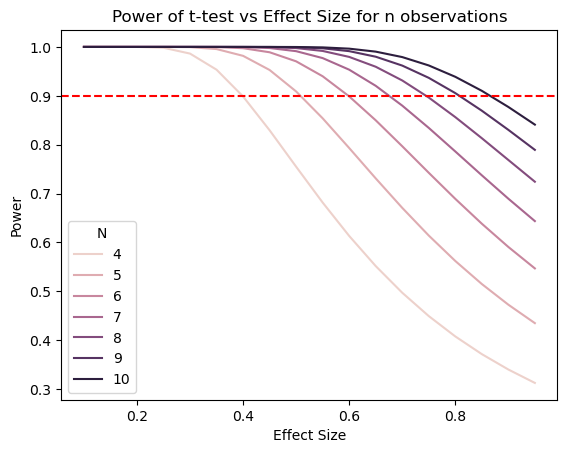

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=df, x='Effect Size', y='Power', hue='N')
#plt.ylim([0, 1.05])
plt.axhline(0.9, color='red', linestyle='--', label='Power = 0.9')
plt.title('Power of t-test vs Effect Size for n observations')